## PyTorch Autograd Example with Simple Function
Ok let's use automatic differentiation to compute a simple derivative of our earlier analytical function:

$$y = f(x_0,x_1) = ln(x_0) + x_0 \cdot x_1 - sin(x_1)$$

And as with before, we'll evaluate the derivative of this function at $$x_0 = 2, x_1=5$$

We can analytically compute the derivative and code it up so that we can verify accuracy later:

In [1]:
#| code-fold: false
import numpy as np
def true_grad(x0,x1):
    return np.array([
        1/x0 + x1,
        x0 - np.cos(x1)
    ])
true_grad(2,5)

array([5.5       , 1.71633781])

But now let's see how to use [PyTorch](https://pytorch.org/ ) to get this using Automatic Differentiation:

### Automatic Differentiation using PyTorch

In [3]:
import torch
x = torch.tensor([2.0, 5.0], requires_grad=True)
print(x)

tensor([2., 5.], requires_grad=True)


In [4]:
def f(x):
    return torch.log(x[0]) + x[0]*x[1] - torch.sin(x[1])
y = f(x)
print(y)

tensor(11.6521, grad_fn=<SubBackward0>)


In [5]:
# Now call the backward AD pass so that we can compute gradients
y.backward()
# Now we can ask for the gradient:
x.grad

tensor([5.5000, 1.7163])

Let's see how well it approximated the true gradient:

In [6]:
true_grad(2,5) - x.grad.numpy()

array([0.00000000e+00, 1.45108339e-08])

### Finite Differences using SciPy

Now let's compare this to computing the same gradient, but using Numerical Differentiation (specifically, Central Finite Differences):

In [7]:
from scipy import optimize
x_np = np.array([2.0, 5.0])
def f_np(x):
    return np.log(x[0]) + x[0]*x[1] - np.sin(x[1])
#y_np = f_np(x_np)
# This computes finite differences opf f_np at x_np:
optimize.approx_fprime(x_np, f_np, epsilon=1e-4)

array([5.4999875 , 1.71628987])

Let's see how well it approximated the true gradient:

In [8]:
true_grad(2,5) - optimize.approx_fprime(x_np, f_np, epsilon=1e-4)

array([1.24995903e-05, 4.79457300e-05])

In [13]:
def numerical_error(e):
    return true_grad(2,5) - optimize.approx_fprime(x_np, f_np, epsilon=e)
#error = lambda e: true_grad(2,5) - optimize.approx_fprime(x_np, y_np, epsilon=e)
epsilons = np.logspace(-13,1,num=21)
errors = [np.linalg.norm(numerical_error(e)) for e in epsilons]

Text(0.5, 1.0, 'Finite Difference Approximation')

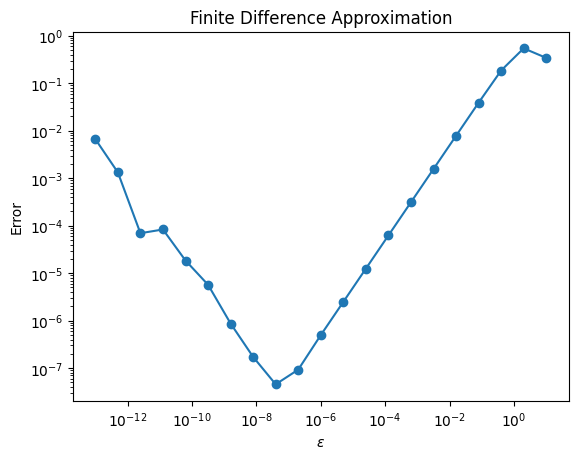

In [14]:
import matplotlib.pyplot as plt
plt.loglog(epsilons,errors,marker='o')
plt.xlabel('$\epsilon$')
plt.ylabel('Error')
plt.title('Finite Difference Approximation')